In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [10]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [17]:
def prepare_image(file):
    img_path = 'C:/Users/Saugat/Desktop/AI_ML_BD_DS/Tensorflow/MobileNet/data/samples/' #path to images
    img = image.load_img(img_path + file, target_size=(224, 224)) # Accepts the images and the target size for the image is set
    img_array = image.img_to_array(img) # Converting loaded images to array from keras image to array function
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)  #Expanding the dimentions of the image array
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

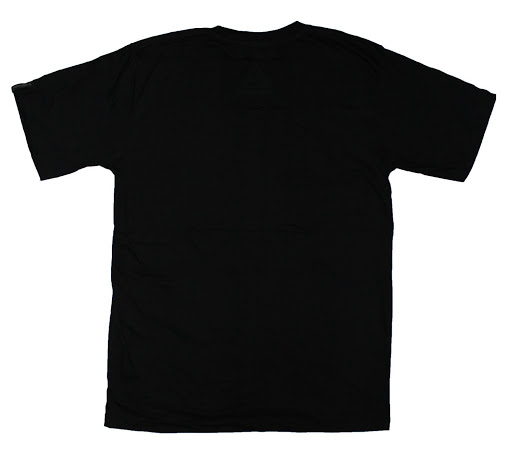

In [18]:
from IPython.display import Image
Image(filename='C:/Users/Saugat/Desktop/AI_ML_BD_DS/Tensorflow/MobileNet/data/samples/samples.jpg', width=300,height=200) 

In [19]:
preprocessed_image = prepare_image('samples.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03595614', 'jersey', 0.9767826),
  ('n04370456', 'sweatshirt', 0.009908475),
  ('n02669723', 'academic_gown', 0.0041708415),
  ('n03787032', 'mortarboard', 0.0025849328),
  ('n04599235', 'wool', 0.002226512)]]

In [33]:
list=[]
i_list=[]
count=0
for i in results:
    for j in i:
        i_list.append(results[0][count][1])
        i_list.append(results[0][count][2])
        count+=1
        list.append(i_list)   
        i_list=[]

In [34]:
list

[['jersey', 0.9767826],
 ['sweatshirt', 0.009908475],
 ['academic_gown', 0.0041708415],
 ['mortarboard', 0.0025849328],
 ['wool', 0.002226512]]

In [37]:
list[1][1]

0.009908475

In [22]:
results[0][0][1]

'jersey'

In [7]:
#Saving model
import os.path
if os.path.isfile('clothing.h5') is False:
    mobile.save('clothing.h5')

In [8]:
#Loading model
from tensorflow.keras.models import load_model
new_model = load_model('clothing.h5')

In [9]:
new_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32